In [2]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt
import yaml as yml

In [9]:
input_file = 'C:/Users/anjis/Documents/Kuantum/inputs/input.yaml'
with open(input_file, 'r') as file:
    inputs = yml.safe_load(file)

In [10]:
inputs

{'sampling k': {'num_sample': 10000,
  'num_thermalization': 10000,
  'beta': 1000000,
  'max_k': 1000},
 'sampling Unitaries': {'num_thermalization': 10000},
 'binary search': {'delta': 0.001, 'eta': 0.5, 'certification': 'mv'},
 'hamiltonian': {'file': 'C:/Users/anjis/Documents/Kuantum/hamiltonians/H2.pkl',
  'norm_bound': 0.5,
  'error_tolerance': 0.01}}

In [7]:
import PhaseEstimation as pe

In [11]:
output  = pe.StatisticalPhaseEstimation(inputs)

Loaded Hamiltonian at C:/Users/anjis/Documents/Kuantum/hamiltonians/H2.pkl, yayy!
Running Metropolis algorithm for 10000 samples starting at k=27.
Sampling ks finished with acceptance rate: 0.4766.
Running Metropolis algorithm for 4.905563552897813 samples starting at n = 8.


TypeError: only integer scalar arrays can be converted to a scalar index

In [25]:
N_sample = 10_000
N_thermalization = 10_000
k_max = 1_001
beta = 1E6
    
sample = Metropolis(N_thermalization, N_sample, k_max, beta)

S = hv.normalization_constant(k_max, beta)
print("Sampling done!")

Running Metropolis algorithm for 10000 samples starting at 73.
Step 0 of 10000.
Step 1000 of 10000.
Step 2000 of 10000.
Step 3000 of 10000.
Step 4000 of 10000.
Step 5000 of 10000.
Step 6000 of 10000.
Step 7000 of 10000.
Step 8000 of 10000.
Step 9000 of 10000.
Step 10000 of 10000.
Step 11000 of 10000.
Step 12000 of 10000.
Step 13000 of 10000.
Step 14000 of 10000.
Step 15000 of 10000.
Step 16000 of 10000.
Step 17000 of 10000.
Step 18000 of 10000.
Step 19000 of 10000.
Sampling done!


In [26]:
r_list, s_list, k_list = get_rs_lists(sample, hamiltonian=H, n_qubits=n_qubits, hf_list=hf_list, tau = get_tau(H))
print("Quantum samples obtained")

Quantum samples obtained


In [32]:
delta = 0.001
eta = 0.4
cdf = acdf(r_list, s_list, k_list, S)
print("ACDF obtained")

ACDF obtained


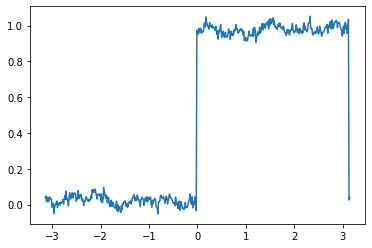

In [28]:
xs = np.linspace(-np.pi, np.pi, 501)
plt.plot(xs, [cdf(x) for x in xs])
plt.show()

In [33]:
x = invert_cdf(r_list, s_list, k_list, delta, eta, S, certify_type='mv')
print("Ground state estimation = {:.4f}".format(x))

mv: 0
mv: 1
mv: 1
mv: 1
mv: 1
mv: 1
mv: 1
mv: 1
mv: 0
mv: 1
mv: 1
mv: 0
mv: 0
mv: 1
Ground state estimation = -0.0148


In [30]:
tau = get_tau(H)
print(tau)

0.015064010347884568


In [34]:
x/tau

-0.9799138213849811

In [23]:
qml.eigvals(H, k=1) * tau

C:\Users\anjis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pennylane\ops\functions\eigvals.py:116: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


array([-0.30558225, -0.04665377, -0.04665377,  0.10117702,  0.10117702,
        0.10907332,  0.10907332,  0.10907332,  0.22100309,  0.42458866,
        0.42458866,  0.46065132,  0.58227291,  0.58227291,  0.65331115,
        0.76616636])

In [41]:
pl, Pl = H.terms()

In [40]:
qml.pauli_decompose(qml.matrix(H))

<Hamiltonian: terms=185, wires=[0, 1, 2, 3, 4, 5, 6, 7]>


In [42]:
pl

[5.660701961652629,
 0.35489055458632535,
 -0.023928794454893043,
 -0.023928794454893043,
 0.35489055458632557,
 -0.023928794454893022,
 -0.023928794454893022,
 0.026103616833238863,
 -0.047560372196071427,
 -0.047560372196071427,
 0.026103616833238922,
 -0.047560372196071454,
 -0.047560372196071454,
 -0.5595033074552554,
 -0.5595033074552553,
 -2.075887537804427,
 -2.075887537804427,
 0.17825971934645382,
 0.03223147063764242,
 0.03223147063764242,
 0.03512910977635857,
 -0.03512910977635857,
 -0.03512910977635857,
 0.03512910977635857,
 0.013885729213759149,
 0.013885729213759149,
 0.013885729213759149,
 0.013885729213759149,
 0.03223147063764242,
 0.03223147063764242,
 0.02832432169694898,
 -0.02832432169694898,
 -0.02832432169694898,
 0.02832432169694898,
 -0.013885729213759149,
 0.013885729213759149,
 0.013885729213759149,
 -0.013885729213759149,
 0.023669040149316867,
 -0.023669040149316867,
 -0.023669040149316867,
 0.023669040149316867,
 0.12024093896605229,
 0.01791809945098066

In [43]:
Pl

[Identity(wires=[0]),
 PauliZ(wires=[0]),
 PauliY(wires=[0]) @ PauliZ(wires=[1]) @ PauliZ(wires=[2]) @ PauliZ(wires=[3]) @ PauliY(wires=[4]),
 PauliX(wires=[0]) @ PauliZ(wires=[1]) @ PauliZ(wires=[2]) @ PauliZ(wires=[3]) @ PauliX(wires=[4]),
 PauliZ(wires=[1]),
 PauliY(wires=[1]) @ PauliZ(wires=[2]) @ PauliZ(wires=[3]) @ PauliZ(wires=[4]) @ PauliY(wires=[5]),
 PauliX(wires=[1]) @ PauliZ(wires=[2]) @ PauliZ(wires=[3]) @ PauliZ(wires=[4]) @ PauliX(wires=[5]),
 PauliZ(wires=[2]),
 PauliY(wires=[2]) @ PauliZ(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliY(wires=[6]),
 PauliX(wires=[2]) @ PauliZ(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliX(wires=[6]),
 PauliZ(wires=[3]),
 PauliY(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliZ(wires=[6]) @ PauliY(wires=[7]),
 PauliX(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliZ(wires=[6]) @ PauliX(wires=[7]),
 PauliZ(wires=[4]),
 PauliZ(wires=[5]),
 PauliZ(wires=[6]),
 PauliZ(wires=[7]),
 PauliZ(wires=[0])

In [46]:
float(sum(np.abs(pl)))

20.139205024653414